In [26]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
path = "/content/gdrive/MyDrive/Colab Notebooks/praktikum_ml/praktikum03"

In [28]:
import pandas as pd

df = pd.read_csv(path + '/data/socr.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [30]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [31]:
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
      .rename(columns={"Height(Inches)": "tinggi_cm", "Weight(Pounds)": "berat_kg"})
      .assign(
          tinggi_cm=lambda x: x["tinggi_cm"] * 2.54,
          berat_kg=lambda x: x["berat_kg"] * 0.453592
      )
      .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [32]:
from sklearn.model_selection import train_test_split

X = df1[["tinggi_cm"]]
y = df1["berat_kg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):        ", model.intercept_)
print("R2 (test):            ", r2)
print("MAE (kg):             ", mean_absolute_error(y_test, y_pred))
print("MSE (kg^2):           ", mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (kg):            ", rmse)

Koefisien (kg per cm): 0.5518217971118468
Intersep (kg):         -37.656882325081
R2 (test):             0.24989238901493693
MAE (kg):              3.6704108331736673
MSE (kg^2):            21.242935603395036
RMSE (kg):             4.60900592355825


In [44]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x + {intercept:.3f}")

Persamaan: y = 0.552 * x + -37.657


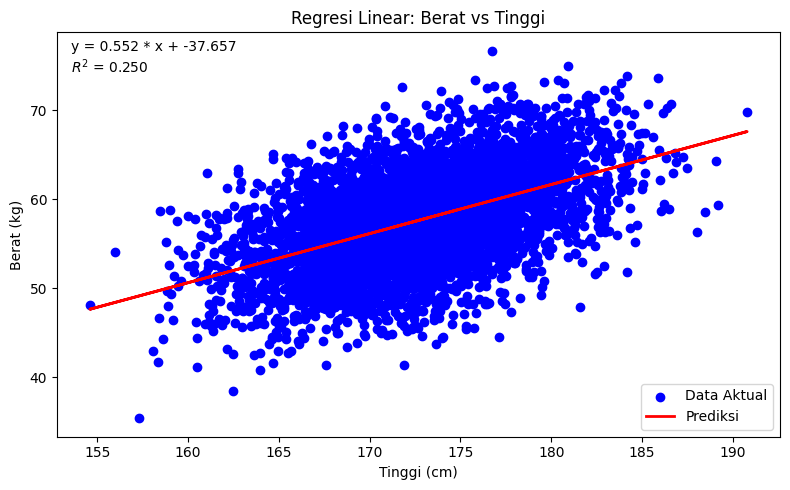

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
    0.02, 0.98,
    f"y = {slope:.3f} * x + {intercept:.3f}\n$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
y_pred_test = model.predict(X_test)

hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat prediksi (kg)": y_pred_test
})

hasil["Selisih error (kg)"] = hasil["Berat prediksi (kg)"] - hasil["Berat aktual (kg)"]

denom = hasil["Berat aktual (kg)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat prediksi (kg),Selisih error (kg),Akurasi (%)
0,174.73,50.16,58.762940,8.602940,82.849003
1,171.31,50.33,56.875710,6.545710,86.994417
2,169.29,58.22,55.761030,-2.458970,95.776417
3,163.30,58.92,52.455617,-6.464383,89.028542
4,170.52,63.06,56.439771,-6.620229,89.501698
...,...,...,...,...,...
4995,178.75,56.59,60.981264,4.391264,92.240212
4996,163.05,47.45,52.317662,4.867662,89.741493
4997,166.51,52.46,54.226965,1.766965,96.631786
4998,167.70,49.90,54.883633,4.983633,90.012759
